In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
air=pd.read_excel("Airlines+Data.xlsx")
air.head(10)


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [5]:
air.shape

(96, 2)

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
air.count()

Month         96
Passengers    96
dtype: int64

<AxesSubplot:>

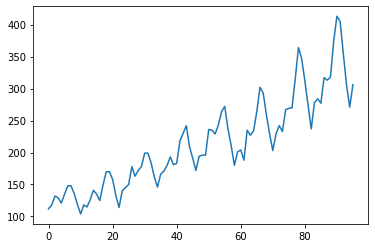

In [10]:
air.Passengers.plot()

In [11]:
air["Date"] = pd.to_datetime(air.Month,format="%b-%y")

air["month"] = air.Date.dt.strftime("%b") 
air["year"] = air.Date.dt.strftime("%y") 

In [12]:
air

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


<AxesSubplot:xlabel='month', ylabel='year'>

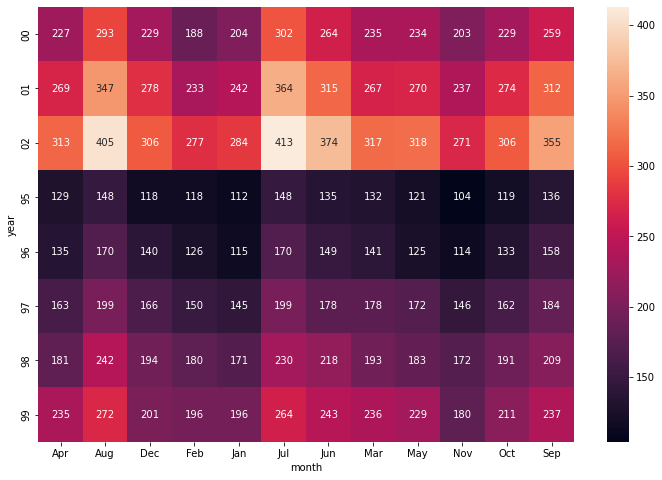

In [13]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

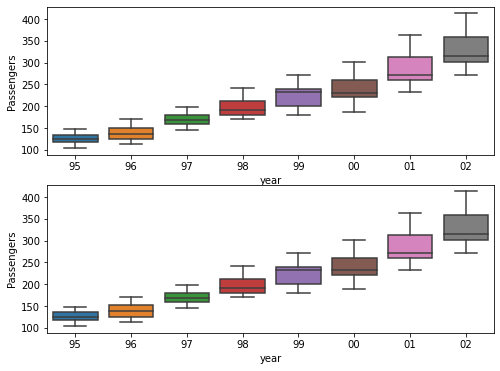

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="year",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air)

In [15]:
month_dummies=pd.get_dummies(air['month'])
air = air.join(month_dummies)
air.head()

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
air['t']=np.arange(1,97)

In [17]:

air["t_squared"] = air["t"]*air["t"]
air["log_Passengers"] = np.log(air["Passengers"])


In [18]:
air.head()

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [20]:
#Data Splitting

Train = air.head(86)
Test = air.tail(10)

In [21]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.643149727782514

In [22]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

49.90312334789315

In [23]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.914363578525986

In [24]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

136.7901043681932

In [25]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

29.104549899233916

In [26]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

144.38493549461418

In [27]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.264958330355368

In [28]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.264958
4,rmse_add_sea_quad,29.104550
1,rmse_Exp,49.903123
2,rmse_Quad,53.914364
0,rmse_linear,58.643150
3,rmse_add_sea,136.790104
5,rmse_Mult_sea,144.384935


### Best Model is Multiplicative Additive Seasonality

In [30]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()

In [31]:
pred_new  = pd.Series(model_full.predict(Test))
np.exp(pred_new)

86    327.613010
87    316.113588
88    313.056237
89    352.392174
90    392.292534
91    392.439833
92    352.559773
93    310.362223
94    272.055527
95    312.532129
dtype: float64

In [32]:
air.tail(10)

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
86,2002-03-01,317,2002-03-01,Mar,02,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,2002-04-01,Apr,02,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,2002-05-01,May,02,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,2002-06-01,374,2002-06-01,Jun,02,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,2002-07-01,413,2002-07-01,Jul,02,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,2002-08-01,405,2002-08-01,Aug,02,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,02,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,02,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,02,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119
95,2002-12-01,306,2002-12-01,Dec,02,0,0,1,0,0,0,0,0,0,0,0,0,96,9216,5.723585
